In [57]:
# Import libraries for K-means clustering on Spotify dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [58]:
# Load Spotify dataset
df = pd.read_csv('../spotify_tracks.csv')
print(df.shape)
print(df.head())

(10000, 10)
        track_name      artist      genre playlist_category  danceability  \
0         Love Sky  Artist_464  Classical             Chill         0.375   
1       Fire Dream  Artist_221  Bollywood          Romantic         0.951   
2      Light Night  Artist_357       Jazz             Sleep         0.732   
3  Love Wave Night  Artist_389        Pop           Workout         0.599   
4       Fire Light  Artist_451        EDM           Workout         0.156   

   energy  valence   tempo  duration_ms  popularity  
0   0.374    0.730  149.34       329908          89  
1   0.333    0.185  124.30       339603          91  
2   0.176    0.347  195.03       130658          87  
3   0.607    0.663   90.66        90342          71  
4   0.477    0.482  142.30       233893          48  


In [59]:
# Check for null values
print("Null values in dataset:")
print(df.isnull().sum())
print("\nTotal null values:", df.isnull().sum().sum())

Null values in dataset:
track_name           0
artist               0
genre                0
playlist_category    0
danceability         0
energy               0
valence              0
tempo                0
duration_ms          0
popularity           0
dtype: int64

Total null values: 0


In [60]:
# Drop irrelevant columns (non-numeric identifiers and categorical data)
df_clustering = df.drop(columns=['track_name', 'artist', 'genre', 'playlist_category'])
print(df_clustering.shape)
print(df_clustering.head())

(10000, 6)
   danceability  energy  valence   tempo  duration_ms  popularity
0         0.375   0.374    0.730  149.34       329908          89
1         0.951   0.333    0.185  124.30       339603          91
2         0.732   0.176    0.347  195.03       130658          87
3         0.599   0.607    0.663   90.66        90342          71
4         0.156   0.477    0.482  142.30       233893          48


## Steps for K-Means Clustering on Spotify Dataset

1. **Data Preprocessing** ✓
   - Load dataset
   - Check for null values
   - Drop irrelevant columns (track_name, artist, genre, playlist_category)

2. **Feature Scaling**
   - Standardize/normalize numeric features using StandardScaler
   - Essential for K-means since it uses distance-based calculations

3. **Determine Optimal Number of Clusters**
   - Use Elbow Method (plot inertia vs number of clusters)
   - Use Silhouette Score (measure cluster quality)

4. **Train K-Means Model**
   - Initialize K-means with optimal k value
   - Fit the model on scaled data

5. **Assign Cluster Labels**
   - Predict cluster assignments for all data points
   - Add cluster labels back to original dataframe

6. **Analyze Clusters**
   - Calculate cluster centroids
   - Examine cluster characteristics and sizes
   - Name clusters based on their features

7. **Visualize Results**
   - Create scatter plots (2D/3D) of clusters
   - Visualize cluster distributions
   - Compare features across clusters

In [61]:
# Step 2: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clustering)
print("Scaled data shape:", X_scaled.shape)
print("First 5 rows of scaled data:\n", X_scaled[:5])

Scaled data shape: (10000, 6)
First 5 rows of scaled data:
 [[-0.41428649 -0.45123702  0.80187189  0.48248857  1.37648308  1.35438449]
 [ 1.58835722 -0.59297    -1.0986381  -0.13643678  1.48845537  1.42426152]
 [ 0.8269354  -1.13570361 -0.53371586  1.61182961 -0.92475261  1.28450746]
 [ 0.3645194   0.35422114  0.56823121 -0.96793234 -1.39038181  0.72549125]
 [-1.17570831 -0.09517612 -0.06294733  0.30847761  0.26755889 -0.07809457]]


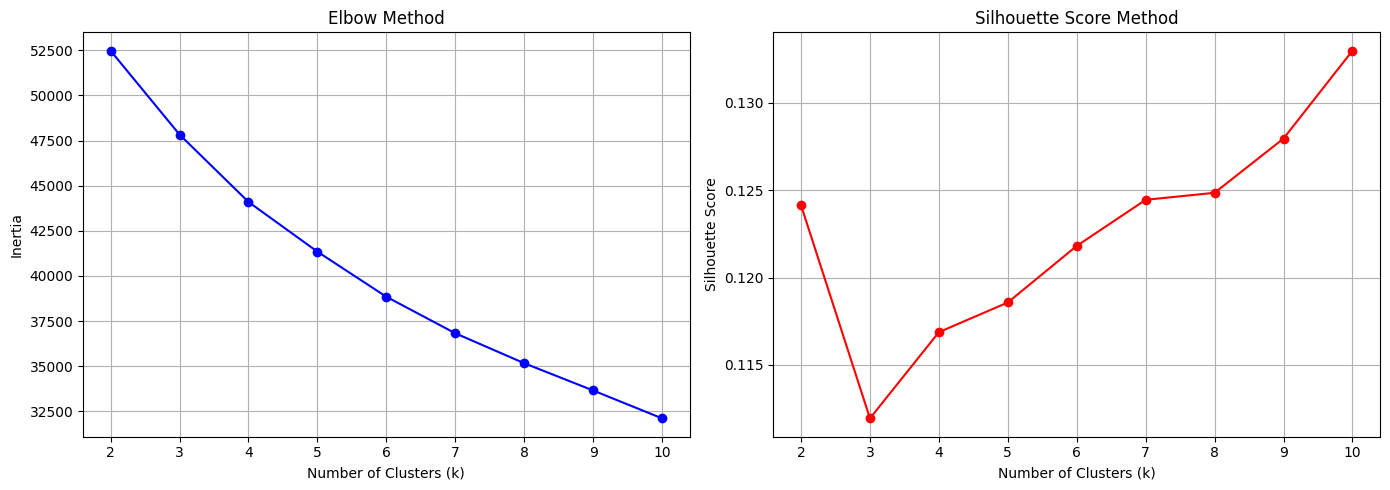

Silhouette Scores:
k=2: 0.1241
k=3: 0.1119
k=4: 0.1169
k=5: 0.1186
k=6: 0.1218
k=7: 0.1245
k=8: 0.1249
k=9: 0.1280
k=10: 0.1330


In [62]:
# Step 3: Determine Optimal Number of Clusters using Elbow Method
inertia = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot Elbow Method
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(K_range, inertia, 'bo-')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia')
ax1.set_title('Elbow Method')
ax1.grid(True)

# Plot Silhouette Scores
ax2.plot(K_range, silhouette_scores, 'ro-')
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Score Method')
ax2.grid(True)

plt.tight_layout()
plt.show()

print("Silhouette Scores:")
for k, score in zip(K_range, silhouette_scores):
    print(f"k={k}: {score:.4f}")

### How to Choose the Optimal Number of Clusters

**Elbow Method:**
- Look for the "elbow" point where the inertia starts decreasing more slowly
- This is where adding more clusters doesn't significantly reduce inertia
- The curve bends/flattens at the optimal k

**Silhouette Score:**
- Ranges from -1 to 1
- Higher scores (closer to 1) = better-defined clusters
- Choose k with the **highest silhouette score**
- Score > 0.5 = reasonable clustering
- Score > 0.7 = strong clustering

**Decision Strategy:**
1. Look at the elbow point in the first graph
2. Check which k has the highest silhouette score
3. If both methods suggest the same k → use that value
4. If different → prefer the silhouette score (more reliable)
5. Consider domain knowledge (do the number of clusters make sense?)

In [63]:
# Step 4: Train K-Means Model with k=5
optimal_k = 5
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_final.fit(X_scaled)

# Step 5: Assign Cluster Labels
df['cluster'] = kmeans_final.labels_
centroids = kmeans_final.cluster_centers_
centroids_original = scaler.inverse_transform(centroids)

print(f"K-Means model trained with k={optimal_k}")
print(f"Cluster sizes:\n{df['cluster'].value_counts().sort_index()}")

K-Means model trained with k=5
Cluster sizes:
cluster
0    2018
1    1931
2    1956
3    2055
4    2040
Name: count, dtype: int64


In [66]:
# Step 6: Analyze Clusters and Assign Names
# Create DataFrame with cluster centroids
feature_names = ['danceability', 'energy', 'valence', 'tempo', 'duration_ms', 'popularity']
centroids_df = pd.DataFrame(centroids_original, columns=feature_names)
centroids_df['cluster'] = range(optimal_k)

print("Cluster Centroids (Original Scale):")
print(centroids_df.round(2))
print("\n" + "="*80 + "\n")

# Analyze each cluster and assign names based on distinctive characteristics
cluster_names = {
    0: "Chill Danceable (Slow Tempo)",      # High dance (0.72), low tempo (98), medium valence
    1: "Happy Long Tracks",                   # High valence (0.79), long duration (258s), low dance
    2: "Sad Long Tracks",                     # Low valence (0.21), long duration (260s)
    3: "Fast Danceable (High Tempo)",         # High dance (0.74), high tempo (163)
    4: "Fast Short Tracks"                    # High tempo (162), short duration (133s)
}

print("Cluster Analysis:")
for i in range(optimal_k):
    centroid = centroids_df[centroids_df['cluster'] == i].iloc[0]
    
    dance = centroid['danceability']
    energy = centroid['energy']
    valence = centroid['valence']
    tempo = centroid['tempo']
    duration = centroid['duration_ms']
    popularity = centroid['popularity']
    
    print(f"Cluster {i}: {cluster_names[i]}")
    print(f"  Danceability: {dance:.2f}, Energy: {energy:.2f}, Valence: {valence:.2f}")
    print(f"  Tempo: {tempo:.1f}, Duration: {duration/1000:.1f}s, Popularity: {popularity:.1f}")
    print()

# Add cluster names to dataframe
df['cluster_name'] = df['cluster'].map(cluster_names)
df.to_csv('spotify_clustered_123.csv')
print("="*80)
print(f"\nCluster distribution:")
print(df['cluster_name'].value_counts())

Cluster Centroids (Original Scale):
   danceability  energy  valence   tempo  duration_ms  popularity  cluster
0          0.72    0.50     0.48   98.67    139955.66       52.65        0
1          0.35    0.51     0.79  107.94    258810.47       51.00        1
2          0.32    0.54     0.21  114.10    260661.21       50.32        2
3          0.74    0.49     0.49  163.78    264761.46       52.56        3
4          0.33    0.49     0.53  162.26    133037.25       44.71        4


Cluster Analysis:
Cluster 0: Chill Danceable (Slow Tempo)
  Danceability: 0.72, Energy: 0.50, Valence: 0.48
  Tempo: 98.7, Duration: 140.0s, Popularity: 52.7

Cluster 1: Happy Long Tracks
  Danceability: 0.35, Energy: 0.51, Valence: 0.79
  Tempo: 107.9, Duration: 258.8s, Popularity: 51.0

Cluster 2: Sad Long Tracks
  Danceability: 0.32, Energy: 0.54, Valence: 0.21
  Tempo: 114.1, Duration: 260.7s, Popularity: 50.3

Cluster 3: Fast Danceable (High Tempo)
  Danceability: 0.74, Energy: 0.49, Valence: 0.49
  Te